In [7]:
# ==============================
# 1. Import Libraries
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [8]:
# ==============================
# 2. Load Dataset# ==============================
# 6. Train Test Split
# ==============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# ==============================

df = pd.read_excel("heart_disease.xlsx")

# Remove extra spaces from column names (VERY IMPORTANT FIX)
df.columns = df.columns.str.strip()

print("Columns in dataset:")
print(df.columns)

Columns in dataset:
Index(['age', 'Age in years'], dtype='object')


In [9]:
# ==============================
# 3. Handle Categorical Columns
# ==============================

# Convert object (string) columns into numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

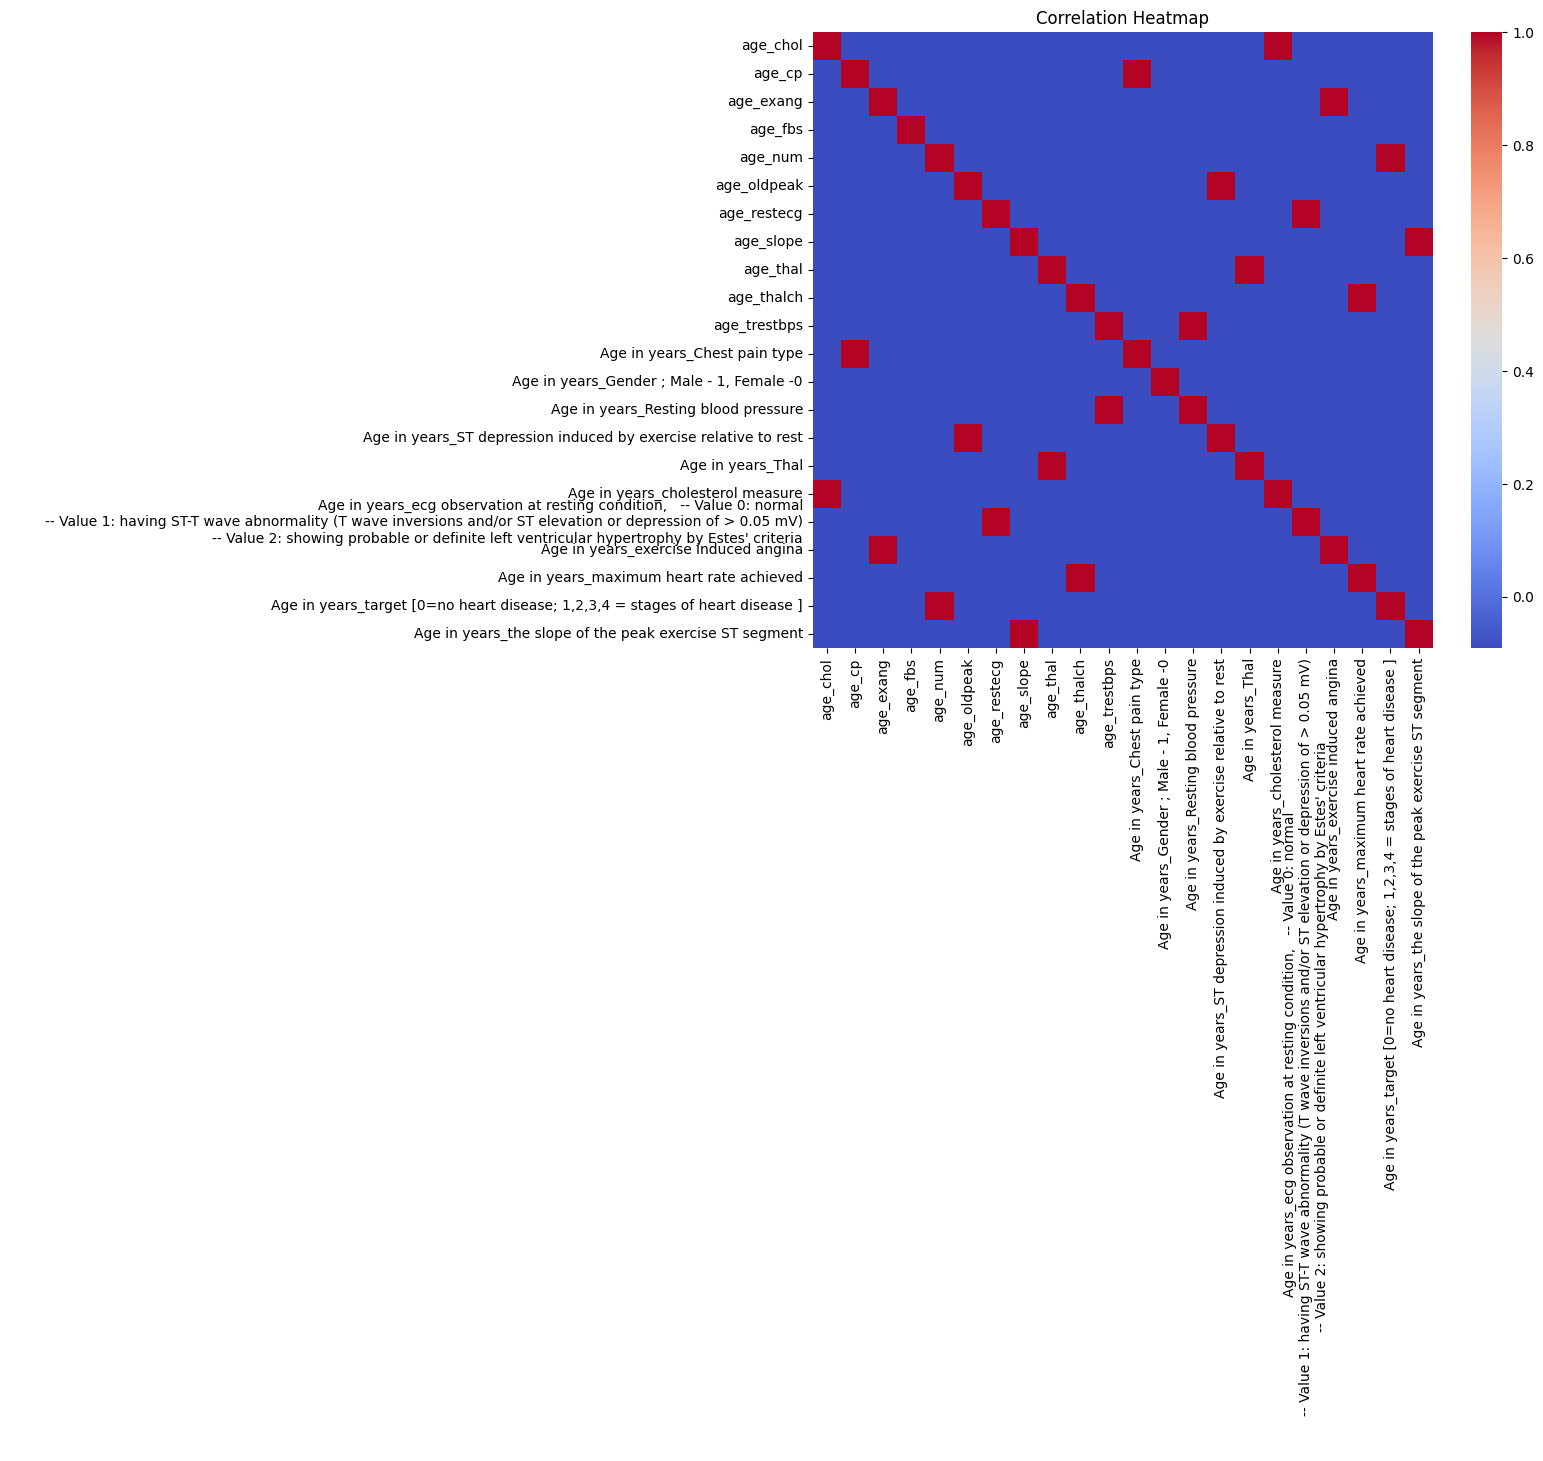

In [10]:
# ==============================
# 4. Correlation Heatmap (Numeric Only)
# ==============================

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# ==============================
# 5. Define Target Column
# ==============================

# Automatically detect last column as target (SAFE METHOD)
target_column = df.columns[-1]

X = df.drop(target_column, axis=1)
y = df[target_column]

print("Target Column Used:", target_column)

Target Column Used: Age in years_the slope of the peak exercise ST segment


In [12]:
# ==============================
# 6. Train Test Split
# ==============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
# ==============================
# 7. Initialize and Train Model
# ==============================

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# ==============================
# 8. Predictions
# ==============================

y_pred = dt_model.predict(X_test)


In [15]:
# ==============================
# 9. Evaluation
# ==============================

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC (FIXED — use predict_proba)
# Check if the model has learned at least two classes for predict_proba
if len(dt_model.classes_) > 1:
    y_prob = dt_model.predict_proba(X_test)[:, 1]
    print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))
elif len(np.unique(y_test)) > 1:
    # If model only saw one class but test set has two, ROC-AUC is not well-defined
    print("\nROC-AUC Score: Cannot be calculated. Model trained on a single class, but test set has multiple classes.")
    print("Ensure both classes are present in the training data (y_train).")
else:
    # If both train and test only have one class
    print("\nROC-AUC Score: Not applicable. Only one class present in both training and test data.")

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Confusion Matrix:
 [[2 0]
 [1 0]]

ROC-AUC Score: Cannot be calculated. Model trained on a single class, but test set has multiple classes.
Ensure both classes are present in the training data (y_train).


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# ==============================
# 10. Hyperparameter Tuning
# ==============================

param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [17]:
# ==============================
# 11. Train Optimized Model
# ==============================

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nOptimized Accuracy:", accuracy_score(y_test, y_pred_best))


Optimized Accuracy: 0.6666666666666666


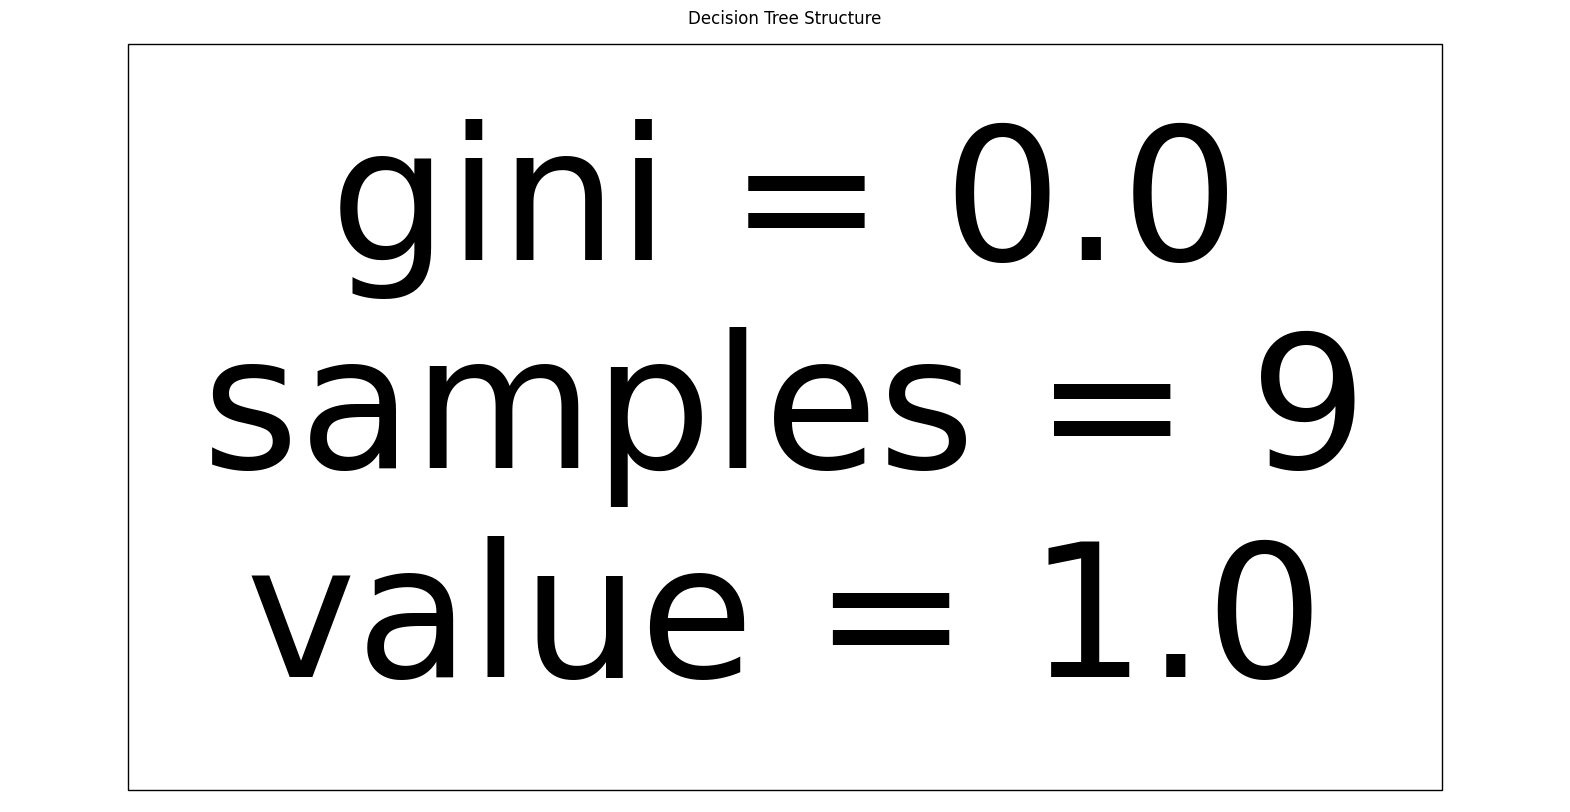

In [18]:
# ==============================
# 12. Visualize Decision Tree
# ==============================

plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Class 0", "Class 1"],
    filled=True
)
plt.title("Decision Tree Structure")
plt.show()